In [12]:
import pandas as pd
import numpy as np
import time
from datetime import datetime
from sklearn.datasets import load_boston
import seaborn as sns
pd.options.display.float_format = '{:.5f}'.format

In [35]:
import warnings
warnings.filterwarnings('ignore')

python, numpy, pandas 날짜 타입 비교 및 정리

- datetime은 python 설치 시 기본적으로 내장된 라이브러리로, 날짜를 쓸 것인지, 시간을 쓸 것인지, 날짜시간을 합쳐쓸 것인지에 따라 클래스가 분화되어 있는 것이 특징. 예를들어 '2021-3-16'을 표시하고 싶으면 date 클래스를 사용하고, '2021-3-16 12:34:21'를 표시하고 싶으면 'datetime' 클래스를 사용합니다. 
- 반면 datetime64나 Timestamp는 각각 numpy, pandas 라이브러리에서 새로 정의한 날짜시간 클래스입니다. 이 둘은 numpy, pandas를 설치해야만 이용할 수 있고, 한 클래스로 날짜, 시간, 날짜시간을 모두 정의할 수 있는 것이 특징
- 날짜, 시간 타입은 일반적인 정수, 실수끼리 연산할 때와 달리 단위를 가지고 있는 점 때문에 시간의 차이를 저장하는 별도의 클래스가 있다는 특징. 이를 timedelta(타임델타)라고 하는데, 날짜, 시간은 특정 시점의 시각을 표시하는 용도이고(2021년 3월 16일), 타임델타는 기간 또는 시간 차이를 표시하는 용도(5일)

- https://ellun.tistory.com/320

<img src='dataset/날짜타입.jpg' STYLE='width:500px;'>

## 파이썬 날짜, 시간

In [10]:
#timestamp -> str
import time

t=time.time()
print(t,type(t))

s=str(time.time())
print(s,type(s))

1656550145.5543015 <class 'float'>
1656550145.5543015 <class 'str'>


In [30]:
# datetime -> str
from datetime import datetime
s= datetime.now()
print(s, type(s))

s1= s.strftime('%Y-%m-%d %H:%M:%S')
print(s1,type(s1))

2022-06-30 10:22:26.568488 <class 'datetime.datetime'>
2022-06-30 10:22:26 <class 'str'>


In [31]:
# str -> datetime
from datetime import datetime
s= '2021-07-20  11:13:58' #str
print(s, type(s))

d= datetime.strptime(s,'%Y-%m-%d %H:%M:%S') #str parsing time
print(d, type(d))

2021-07-20  11:13:58 <class 'str'>
2021-07-20 11:13:58 <class 'datetime.datetime'>


In [34]:
# str -> datetime -> timestamp 
s = '2021-07-20  11:13:58'
timestamp = time.mktime(datetime.strptime(s,'%Y-%m-%d %H:%M:%S').timetuple())
print(timestamp, type(timestamp))

1626747238.0 <class 'float'>


In [40]:
#datetime -> timestamp : datetime을 tuple로 바꿔야함
d= datetime.today()
print(d, type(d))

timestamp= time.mktime(d.timetuple())

2022-06-30 10:25:17.748830 <class 'datetime.datetime'>


In [43]:
#timestamp -> datetime
t= time.time()
print(t,type(t))

d= datetime.fromtimestamp(t)
print(d,type(d))

1656552451.8582873 <class 'float'>
2022-06-30 10:27:31.858287 <class 'datetime.datetime'>


### 과제 (0701)
- 현재시간을 불러와서 timestamp로 불러와서 datetime, str로 타입을 변경한 후, 다시 timestamp로 변경하여라.
- 원하는 날짜+시간을 5개 str로 만든 후, datetime, timestamp 타입으로 변경하세요.

In [8]:
t=time.time() #timestamp
d= datetime.fromtimestamp(t) #datetime
s1= d.strftime('%Y-%m-%d %H:%M:%S') #str
timestamp = time.mktime(datetime.strptime(s1,'%Y-%m-%d %H:%M:%S').timetuple())
print(timestamp, type(timestamp))

1656597419.0 <class 'float'>


- 신선식품 새벽배송 구매고객 데이터라고 할 때, 5-6월 주문목록을 보면 보통 일주일이내로 재주문을 하는 것을 볼 수 있다. 그런데 다섯번째 주문s5가 지난 주문과의 간격이 한달정도 벌어진다. 구매 데이터를 모두 분석하여 평균 재구매 일 수를 계산하고, 오차범위를 넘어서도 주문이 없으면 쿠폰, 알림 팝업을 제공하는 방안...
- 함수로 만들어서 ~~ 아예 정리하자

In [11]:
s1 = '2022-05-01'
s2= '2022-05-07'
s3= '2022-05-15'
s4= '2022-05-20'
s5= '2022-06-20'

#timestamp로 바꾸기
ts1 = time.mktime(datetime.strptime(s1,'%Y-%m-%d').timetuple())
ts2 = strptime(s2, '%Y-%m-%d')
ts1 = time.mktime(datetime.strptime(s1,'%Y-%m-%d').timetuple()) #str > timestamp
dt2= datetime.strptime(s2,'%Y-%m-%d') # str > datetime
ts3 = time.mktime(datetime.strptime(s3,'%Y-%m-%d').timetuple())
dt4= datetime.strptime(s4,'%Y-%m-%d')
dt5 =datetime.strptime(s5,'%Y-%m-%d')
print(ts1,dt2,ts3,dt4,dt5)

1651330800.0 2022-05-07 00:00:00 1652540400.0 2022-05-20 00:00:00 2022-06-20 00:00:00


In [51]:
#1년 전 datetime 값 : timedelta()
from datetime import timedelta
import time

datetime_now = datetime.now()
delta_datetime = timedelta(days= -365)
print(delta_datetime)

datetime_now + delta_datetime

-365 days, 0:00:00


datetime.datetime(2021, 6, 30, 10, 35, 38, 834485)

In [60]:
# 두 날짜간의 일수 구하기
since_timestamp = datetime.strptime('20220630','%Y%m%d')
# until_timestamp = datetime.now()
until_timestamp = datetime.strptime('20221231','%Y%m%d')

print(since_timestamp)
print(until_timestamp)
result = until_timestamp - since_timestamp
print(result)

2022-06-30 00:00:00
2022-12-31 00:00:00
184 days, 0:00:00


In [64]:
# 특정요일 구하기 : weekday()
import datetime
def get_yoil(y,m,d):
    days = ['MON','TUE','WED','THU','FRI','SAT','SUN']
    return days[datetime.date(y,m,d).weekday()]

get_yoil(2022,6,30)

'THU'

## 판다스 날짜, 시간
    - # 파이썬의 datetime = 판다스의 timestamp 라고 한다.

In [67]:
# to_datetime
import pandas as pd
pd.to_datetime(1656552451.8582873, unit='s') # 파이썬의 datetime = 판다스의 timestamp 라고 한다.

Timestamp('2022-06-30 01:27:31.858287360')

In [70]:
date = pd.Timestamp(1656552451.8582873, unit='s',tz='Asia/Seoul') #timeZone
print(date, type(date))

2022-06-30 10:27:31.858287334+09:00 <class 'pandas._libs.tslibs.timestamps.Timestamp'>


In [78]:
df= pd.read_csv('dataset/stock-data.csv')
df.head()

,Date,Close,Start,High,Low,Volume
0,2018-07-02,10100,10850,10900,10000,137977
1,2018-06-29,10700,10550,10900,9990,170253
2,2018-06-28,10400,10900,10950,10150,155769
3,2018-06-27,10900,10800,11050,10500,133548
4,2018-06-26,10800,10900,11000,10700,63039


In [79]:
#dataset 요약 - date만 obj(문자) > 계산 불가 > datetime으로 변경
df.info()

df['New_Date'] = pd.to_datetime(df['Date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    20 non-null     object
 1   Close   20 non-null     int64 
 2   Start   20 non-null     int64 
 3   High    20 non-null     int64 
 4   Low     20 non-null     int64 
 5   Volume  20 non-null     int64 
dtypes: int64(5), object(1)
memory usage: 1.1+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      20 non-null     object        
 1   Close     20 non-null     int64         
 2   Start     20 non-null     int64         
 3   High      20 non-null     int64         
 4   Low       20 non-null     int64         
 5   Volume    20 non-null     int64         
 6   New_Date  20 non-null     datetime64[ns]
dtypes: datetime64[ns](1), int64(5), object(

In [80]:
df.drop('Date',axis=1, inplace=True)
df['year'] = df['New_Date'].dt.year
df['month'] = df['New_Date'].dt.month
df['day'] = df['New_Date'].dt.day
df.head()

,Close,Start,High,Low,Volume,New_Date,year,month,day
0,10100,10850,10900,10000,137977,2018-07-02,2018,7,2
1,10700,10550,10900,9990,170253,2018-06-29,2018,6,29
2,10400,10900,10950,10150,155769,2018-06-28,2018,6,28
3,10900,10800,11050,10500,133548,2018-06-27,2018,6,27
4,10800,10900,11000,10700,63039,2018-06-26,2018,6,26


In [84]:
df1 =df.copy()

In [85]:
#New Date를 새로운 인덱스로
df1.set_index('New_Date',inplace = True)
df1.head()

,Close,Start,High,Low,Volume,year,month,day
New_Date,,,,,,,,
2018-07-02,10100,10850,10900,10000,137977,2018,7,2
2018-06-29,10700,10550,10900,9990,170253,2018,6,29
2018-06-28,10400,10900,10950,10150,155769,2018,6,28
2018-06-27,10900,10800,11050,10500,133548,2018,6,27
2018-06-26,10800,10900,11000,10700,63039,2018,6,26


In [86]:
df1.index

DatetimeIndex(['2018-07-02', '2018-06-29', '2018-06-28', '2018-06-27',
               '2018-06-26', '2018-06-25', '2018-06-22', '2018-06-21',
               '2018-06-20', '2018-06-19', '2018-06-18', '2018-06-15',
               '2018-06-14', '2018-06-12', '2018-06-11', '2018-06-08',
               '2018-06-07', '2018-06-05', '2018-06-04', '2018-06-01'],
              dtype='datetime64[ns]', name='New_Date', freq=None)

In [90]:
df1_ym = df1.loc['2018-07','Start':'Low'] #이렇게 부분으로만 인덱싱이 가능
df1_ym

,Start,High,Low
New_Date,,,
2018-07-02,10850,10900,10000


In [95]:
#데이터 range를 만들때
pd.date_range(start='2020-10-01', end='2020-10-20', periods=10) #periods는 step의 개념이 아니라, 기간중 '몇 개'로 출력할지!


DatetimeIndex(['2020-10-01 00:00:00', '2020-10-03 02:40:00',
               '2020-10-05 05:20:00', '2020-10-07 08:00:00',
               '2020-10-09 10:40:00', '2020-10-11 13:20:00',
               '2020-10-13 16:00:00', '2020-10-15 18:40:00',
               '2020-10-17 21:20:00', '2020-10-20 00:00:00'],
              dtype='datetime64[ns]', freq=None)

In [98]:
#
dates = pd.date_range('1/1/2000',periods=100, freq = 'W-WED') #2000부터 수요일단위로 100개 만들어줌
print(dates)

DatetimeIndex(['2000-01-05', '2000-01-12', '2000-01-19', '2000-01-26',
               '2000-02-02', '2000-02-09', '2000-02-16', '2000-02-23',
               '2000-03-01', '2000-03-08', '2000-03-15', '2000-03-22',
               '2000-03-29', '2000-04-05', '2000-04-12', '2000-04-19',
               '2000-04-26', '2000-05-03', '2000-05-10', '2000-05-17',
               '2000-05-24', '2000-05-31', '2000-06-07', '2000-06-14',
               '2000-06-21', '2000-06-28', '2000-07-05', '2000-07-12',
               '2000-07-19', '2000-07-26', '2000-08-02', '2000-08-09',
               '2000-08-16', '2000-08-23', '2000-08-30', '2000-09-06',
               '2000-09-13', '2000-09-20', '2000-09-27', '2000-10-04',
               '2000-10-11', '2000-10-18', '2000-10-25', '2000-11-01',
               '2000-11-08', '2000-11-15', '2000-11-22', '2000-11-29',
               '2000-12-06', '2000-12-13', '2000-12-20', '2000-12-27',
               '2001-01-03', '2001-01-10', '2001-01-17', '2001-01-24',
      

In [100]:
pd.date_range('2000-01-01','2000-01-03 23:59', freq='4h')

DatetimeIndex(['2000-01-01 00:00:00', '2000-01-01 04:00:00',
               '2000-01-01 08:00:00', '2000-01-01 12:00:00',
               '2000-01-01 16:00:00', '2000-01-01 20:00:00',
               '2000-01-02 00:00:00', '2000-01-02 04:00:00',
               '2000-01-02 08:00:00', '2000-01-02 12:00:00',
               '2000-01-02 16:00:00', '2000-01-02 20:00:00',
               '2000-01-03 00:00:00', '2000-01-03 04:00:00',
               '2000-01-03 08:00:00', '2000-01-03 12:00:00',
               '2000-01-03 16:00:00', '2000-01-03 20:00:00'],
              dtype='datetime64[ns]', freq='4H')

In [17]:
import pandas as pd
import numpy as np
import time
from datetime import datetime
%pwd

'C:\\cakd7\\m2_분석라이브러리활용\\pandas'

In [30]:
df=pd.read_csv('./dataset/stock-data.csv') #원래는 ./뒤에 상대경로를 붙이는게 원칙
df.head()

,Date,Close,Start,High,Low,Volume
0,2018-07-02,10100,10850,10900,10000,137977
1,2018-06-29,10700,10550,10900,9990,170253
2,2018-06-28,10400,10900,10950,10150,155769
3,2018-06-27,10900,10800,11050,10500,133548
4,2018-06-26,10800,10900,11000,10700,63039


In [31]:
df['New_Date'] = pd.to_datetime(df['Date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      20 non-null     object        
 1   Close     20 non-null     int64         
 2   Start     20 non-null     int64         
 3   High      20 non-null     int64         
 4   Low       20 non-null     int64         
 5   Volume    20 non-null     int64         
 6   New_Date  20 non-null     datetime64[ns]
dtypes: datetime64[ns](1), int64(5), object(1)
memory usage: 1.2+ KB


In [57]:
#날짜 인덱스
df1=df.copy()
df1.set_index('New_Date',inplace=True)
df1.drop('Date',axis=1, inplace=True)
df1.head()

,Close,Start,High,Low,Volume
New_Date,,,,,
2018-07-02,10100,10850,10900,10000,137977
2018-06-29,10700,10550,10900,9990,170253
2018-06-28,10400,10900,10950,10150,155769
2018-06-27,10900,10800,11050,10500,133548
2018-06-26,10800,10900,11000,10700,63039


In [58]:
#인덱스 리셋 #다시 앞에 인덱스 채워주기
df1=df1.reset_index()
df1.head()

,New_Date,Close,Start,High,Low,Volume
0,2018-07-02,10100,10850,10900,10000,137977
1,2018-06-29,10700,10550,10900,9990,170253
2,2018-06-28,10400,10900,10950,10150,155769
3,2018-06-27,10900,10800,11050,10500,133548
4,2018-06-26,10800,10900,11000,10700,63039


In [59]:
df1['Month'] = df1.New_Date.dt.month
df1.head()

,New_Date,Close,Start,High,Low,Volume,Month
0,2018-07-02,10100,10850,10900,10000,137977,7
1,2018-06-29,10700,10550,10900,9990,170253,6
2,2018-06-28,10400,10900,10950,10150,155769,6
3,2018-06-27,10900,10800,11050,10500,133548,6
4,2018-06-26,10800,10900,11000,10700,63039,6


In [60]:
df1 = df1.set_index('Month')
df1.head()

,New_Date,Close,Start,High,Low,Volume
Month,,,,,,
7,2018-07-02,10100,10850,10900,10000,137977
6,2018-06-29,10700,10550,10900,9990,170253
6,2018-06-28,10400,10900,10950,10150,155769
6,2018-06-27,10900,10800,11050,10500,133548
6,2018-06-26,10800,10900,11000,10700,63039


<AxesSubplot:xlabel='Month'>

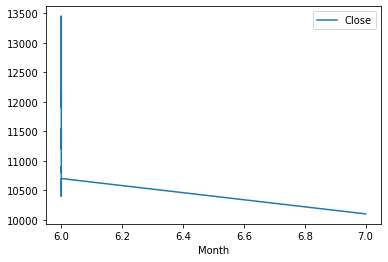

In [61]:
df_g=df1[['Close']]
df_g.plot()

In [64]:
df1=df1.reset_index()
df1.head()

,Month,New_Date,Close,Start,High,Low,Volume
0,7,2018-07-02,10100,10850,10900,10000,137977
1,6,2018-06-29,10700,10550,10900,9990,170253
2,6,2018-06-28,10400,10900,10950,10150,155769
3,6,2018-06-27,10900,10800,11050,10500,133548
4,6,2018-06-26,10800,10900,11000,10700,63039


## 결측치, 통계량, 중복행

### 결측치
- 함수 : dropna / fillna / replace
- df.dropna(subset=['column'],inplace = True)
- fillna(method='')
- df.column.replace(np.nan, df.column.mean(), inplace = True)
- df.dropna(axis =0, inplace = True) #행 전체 삭제 #df.dropna(inplace=True)라고 하셨는데, axis가 default인지 확인.

In [3]:
import seaborn as sns
df_t = sns.load_dataset('titanic')
df_t.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [4]:
df_t.embarked.value_counts()

S    644
C    168
Q     77
Name: embarked, dtype: int64

In [5]:
#결측치를 앞(ffill)이나 뒤(bfill)의 값으로 교체
df_t.embarked.fillna(method='ffill', inplace=True)
df_t.embarked.value_counts()

S    644
C    169
Q     78
Name: embarked, dtype: int64

In [6]:
df_t.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         0
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

### Q. 과제(0701)
- age 컬럼의 결측치를 적절한 값으로 대체하시고, 그 근거를 설명하세요.
- deck 컬럼의 삭제 여부를 판단하는 근거를 설명하세요.

In [7]:
df = sns.load_dataset('titanic')

In [ ]:
# data의 목적을 생존과 기타변수의 관계를 파악하는 것이라고 했을 때,
# age의 nan값에 1) age의 평균 2) age의 중간값 을 넣었을 때, 전 후 corr차이가 적고, 특히 survived와 적은 것을 선택. 
# > 평균으로 대체

In [8]:
#평균으로 대체 
df1= df.copy()
age_mean = round(df.age.mean(),0)
print(age_mean)

df1.age.fillna(age_mean, inplace=True)
df1.corr() - df.corr()

30.0


,survived,pclass,age,sibsp,parch,fare,adult_male,alone
survived,0.000000,0.000000,0.006564,0.000000,0.00000,0.000000,0.000000,0.000000
pclass,0.000000,0.000000,0.039499,0.000000,0.00000,0.000000,0.000000,0.000000
age,0.006564,0.039499,0.000000,0.075807,0.00879,-0.005435,-0.026183,-0.017105
sibsp,0.000000,0.000000,0.075807,0.000000,0.00000,0.000000,0.000000,0.000000
parch,0.000000,0.000000,0.008790,0.000000,0.00000,0.000000,0.000000,0.000000
fare,0.000000,0.000000,-0.005435,0.000000,0.00000,0.000000,0.000000,0.000000
adult_male,0.000000,0.000000,-0.026183,0.000000,0.00000,0.000000,0.000000,0.000000
alone,0.000000,0.000000,-0.017105,0.000000,0.00000,0.000000,0.000000,0.000000


In [9]:
# 중간값 대체
df2 = df.copy()
age_median = round(df.age.median(),0)
print(age_median)

df2.age.fillna(age_median, inplace=True)
df2.corr() - df.corr()

28.0


,survived,pclass,age,sibsp,parch,fare,adult_male,alone
survived,0.000000,0.000000,0.012311,0.00000,0.000000,0.000000,0.000000,0.000000
pclass,0.000000,0.000000,0.029328,0.00000,0.000000,0.000000,0.000000,0.000000
age,0.012311,0.029328,0.000000,0.07495,0.016637,0.000622,-0.032624,-0.026623
sibsp,0.000000,0.000000,0.074950,0.00000,0.000000,0.000000,0.000000,0.000000
parch,0.000000,0.000000,0.016637,0.00000,0.000000,0.000000,0.000000,0.000000
fare,0.000000,0.000000,0.000622,0.00000,0.000000,0.000000,0.000000,0.000000
adult_male,0.000000,0.000000,-0.032624,0.00000,0.000000,0.000000,0.000000,0.000000
alone,0.000000,0.000000,-0.026623,0.00000,0.000000,0.000000,0.000000,0.000000


In [10]:
# 선실번호는 class, pclass와 비슷한 정보를 담고 있기에 대체 가능. 또한 결측치가 891개 중 688개로 다른 변수와 상관관계를 입증하기 어려운 갯수라고 판단.
#선실 고유번호 가장 앞자리 알파벳  - class > suvived 연관있지 않을까?
df = sns.load_dataset('titanic')
df = df[['deck','class','survived']]
df.head()

,deck,class,survived
0,NaN,Third,0
1,C,First,1
2,NaN,Third,1
3,C,First,1
4,NaN,Third,0


In [11]:
#관계 파악하기
pd.pivot_table(df,
               index = 'class',
               columns = 'deck',
               values='survived',
               aggfunc = 'mean')

deck,A,B,C,D,E,F,G
class,,,,,,,
First,0.466667,0.744681,0.59322,0.758621,0.72,NaN,NaN
Second,NaN,NaN,NaN,0.750000,0.75,0.875,NaN
Third,NaN,NaN,NaN,NaN,1.00,0.200,0.5


### 중복행

In [12]:
#중복
df= pd.DataFrame({'c1':['a','a','b','a','b'],
                 'c2':[1,1,1,2,2],
                 'c3':[1,1,2,2,2]})
df

,c1,c2,c3
0,a,1,1
1,a,1,1
2,b,1,2
3,a,2,2
4,b,2,2


In [13]:
#전체 행 데이터중에서 중목 #"행 단위로!", 누적 True, False
df_dup = df.duplicated()
df_dup

0    False
1     True
2    False
3    False
4    False
dtype: bool

In [107]:
#특정 열 데이터중에서 중복 #누적
col_dup = df.c2.duplicated()
col_dup

0    False
1     True
2     True
3    False
4     True
Name: c2, dtype: bool

In [108]:
# 중복 행 삭제 : drop_duplicates()
df2 = df.drop_duplicates()
df2

,c1,c2,c3
0,a,1,1
2,b,1,2
3,a,2,2
4,b,2,2


In [111]:
#특정 열의 중복 삭제
df3= df.drop_duplicates(subset=['c2','c3']) #col이 두개인경우 합집합으로 출력됨.
df

,c1,c2,c3
0,a,1,1
1,a,1,1
2,b,1,2
3,a,2,2
4,b,2,2


In [114]:
#데이터 단위 변경
auto_df = pd.read_csv('./dataset/auto-mpg.csv')
auto_df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [115]:
# mpg를 kpl로 환산
mpg_to_kpl = 1.60934 / 3.78541
mpg_to_kpl

0.42514285110463595

In [127]:
auto_df['kpl']= auto_df['mpg'].apply(lambda x:round((x*mpg_to_kpl),2))
auto_df[['mpg','kpl']].head()

,mpg,kpl
0,18.0,7.65
1,15.0,6.38
2,18.0,7.65
3,16.0,6.80
4,17.0,7.23


In [130]:
#horsepower열에는 ?가 있어서 dtype이 obj로 나오는 상황
auto_df.horsepower.unique()

array(['130', '165', '150', '140', '198', '220', '215', '225', '190',
       '170', '160', '95', '97', '85', '88', '46', '87', '90', '113',
       '200', '210', '193', '?', '100', '105', '175', '153', '180', '110',
       '72', '86', '70', '76', '65', '69', '60', '80', '54', '208', '155',
       '112', '92', '145', '137', '158', '167', '94', '107', '230', '49',
       '75', '91', '122', '67', '83', '78', '52', '61', '93', '148',
       '129', '96', '71', '98', '115', '53', '81', '79', '120', '152',
       '102', '108', '68', '58', '149', '89', '63', '48', '66', '139',
       '103', '125', '133', '138', '135', '142', '77', '62', '132', '84',
       '64', '74', '116', '82'], dtype=object)

In [134]:
# replace로 대체
import numpy as np
auto_df.horsepower.replace('?',np.nan, inplace = True)
auto_df.dropna(subset=['horsepower'],axis=0, inplace=True)
auto_df.horsepower.isnull().sum()

auto_df.info() #여전히 dtype은 변하지 않음

#dtype : obj > int : by astype('type')
auto_df.horsepower = auto_df.horsepower.astype('float')
auto_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   model year    392 non-null    int64  
 7   origin        392 non-null    int64  
 8   car name      392 non-null    object 
 9   kpl           392 non-null    float64
dtypes: float64(5), int64(4), object(1)
memory usage: 33.7+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    floa

### 과제(0701)
- horsepower의 '?'가 있는 인덱스(boolean 인덱싱)를 찾아서 해당 행을 삭제하세요.

In [36]:
auto_df = pd.read_csv('./dataset/auto-mpg.csv')
auto_df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [31]:
#drop_index : 방법1
drop_index = auto_df.loc[auto_df.horsepower=='?','horsepower'].index
drop_index

Int64Index([32, 126, 330, 336, 354, 374], dtype='int64')

In [39]:
#drop_index : 방법2
condition = (auto_df.horsepower=='?')
drop_index = auto_df[condition].index
drop_index

Int64Index([32, 126, 330, 336, 354, 374], dtype='int64')

In [32]:
auto_df.drop(axis=0, index = drop_index, inplace = True)

In [33]:
auto_df.horsepower.unique()

array(['130', '165', '150', '140', '198', '220', '215', '225', '190',
       '170', '160', '95', '97', '85', '88', '46', '87', '90', '113',
       '200', '210', '193', '100', '105', '175', '153', '180', '110',
       '72', '86', '70', '76', '65', '69', '60', '80', '54', '208', '155',
       '112', '92', '145', '137', '158', '167', '94', '107', '230', '49',
       '75', '91', '122', '67', '83', '78', '52', '61', '93', '148',
       '129', '96', '71', '98', '115', '53', '81', '79', '120', '152',
       '102', '108', '68', '58', '149', '89', '63', '48', '66', '139',
       '103', '125', '133', '138', '135', '142', '77', '62', '132', '84',
       '64', '74', '116', '82'], dtype=object)

## 0704

In [56]:
auto_df = pd.read_csv('./dataset/auto-mpg.csv')
auto_df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [42]:
#origin 열의 고유값을 출력하세요
auto_df.origin.unique()

array([1, 3, 2], dtype=int64)

In [57]:
# 정수형 데이터를 문자형 데이터로 변환한 후 고유값을 출력하세요.(1:'USA', 2:'EU', 3:'JAPAN')
auto_df.origin.replace({1:'USA', 2:'EU', 3:'JAPAN'}, inplace= True)
auto_df.origin.unique()

array(['USA', 'JAPAN', 'EU'], dtype=object)

- 타입변경 <br>
astype / dtypes

In [61]:
auto_df.origin.dtypes #타입확인
auto_df.origin = auto_df.origin.astype('category') #범주형으로 변경
auto_df.origin.dtypes

CategoricalDtype(categories=['EU', 'JAPAN', 'USA'], ordered=False)

In [62]:
auto_df.origin = auto_df.origin.astype('str') #문자형으로 변경
auto_df.origin.dtypes

dtype('O')

In [113]:
# horsepower ? 처리된 dataset불러오기
auto_df = pd.read_pickle('dataset/auto-mpg.pkl')
auto_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   model year    392 non-null    int64  
 7   origin        392 non-null    int64  
 8   car name      392 non-null    object 
dtypes: float64(4), int64(4), object(1)
memory usage: 30.6+ KB


- 범주화(숫자 구간별로)

In [218]:
#horsepower를 3개의 bin으로 나누고,
#bin_names = ['저출력','보통출력','고출력']으로 출력하세요.
import numpy as np

count, bin_dividers = np.histogram(auto_df.horsepower, bins=3) #bins= 범주화할 갯수

print(count, bin_dividers, '\n') #구간별 갯수 #나눠지는 구간 내용(최대-최소 / bins)

bin_names = ['저출력','보통출력','고출력']
auto_df['hp_bin'] = pd.cut(x = auto_df.horsepower, #데이터배열
                          bins = bin_dividers,#경계값 리스트
                          labels = bin_names, #bin 이름
                          include_lowest = True) #경계값 포함여부

print(auto_df[['horsepower','hp_bin']].hp_bin.value_counts())
auto_df[['horsepower','hp_bin']].head()

[257 103  32] [ 46.         107.33333333 168.66666667 230.        ] 

저출력     257
보통출력    103
고출력      32
Name: hp_bin, dtype: int64


,horsepower,hp_bin
0,130.00000,보통출력
1,165.00000,보통출력
2,150.00000,보통출력
3,150.00000,보통출력
4,140.00000,보통출력


In [119]:
# Q. horsepower 열의 최대값의 절대값으로 모든 데이터를 나누는 정규화를 수행한 후 통계요약표를 출력하세요.
hp_max = auto_df.horsepower.abs().max()
auto_df['hp'] = auto_df['horsepower']/hp_max
auto_df[['horsepower','hp']].describe()

,horsepower,hp
count,392.000000,392.000000
mean,104.469388,0.454215
std,38.491160,0.167353
min,46.000000,0.200000
25%,75.000000,0.326087
50%,93.500000,0.406522
75%,126.000000,0.547826
max,230.000000,1.000000


- FIFA data <br>
: 연봉예측

In [121]:
fifa = pd.read_csv('dataset/FIFA.csv', encoding = 'cp949')
fifa.head()

,ID,Name,Age,Nationality,Overall,Club,Preferred_Foot,Work_Rate,Position,Jersey_Number,Contract_Valid_Until,Height,Weight_lb,Release_Clause,Value,Wage
0,158023,L. Messi,31,Argentina,94,FC Barcelona,Left,Medium/ Medium,RF,10,2021,5'7,159,226500,110500,565
1,20801,Cristiano Ronaldo,33,Portugal,94,Juventus,Right,High/ Low,ST,7,2022,6'2,183,127100,77000,405
2,190871,Neymar Jr,26,Brazil,92,Paris Saint-Germain,Right,High/ Medium,LW,10,2022,5'9,150,228100,118500,290
3,193080,De Gea,27,Spain,91,Manchester United,Right,Medium/ Medium,GK,1,2020,6'4,168,138600,72000,260
4,192985,K. De Bruyne,27,Belgium,91,Manchester City,Right,High/ High,RCM,7,2023,5'11,154,196400,102000,355


### 과제(0704)
- fifa data전처리 - height의 값을 cm로 변환하여 컬럼 'height_cm'를 생성하세요.

In [126]:
fifa.Height.head()

0     5'7
1     6'2
2     5'9
3     6'4
4    5'11
Name: Height, dtype: object

### 데이터프레임 결합
- concat, merge, join
* 판다스 join() 메소드는 merge() 함수를 기반으로 만들어졌기 때문에 기본 작동 방식이 서로 비슷
* join() 메소드는 두 데이터프레임의 행 인덱스를 기준으로 결합하는 점에서 merge와 차이가 있으나 on=keys 옵션 설정하면 열을 기준으로 결합
- index는 join , col는 merge

In [220]:
data1 = np.arange(1,21).reshape(4,5)
data2 =np.arange(11,31).reshape(5,4)
df1 = pd.DataFrame(data1, columns = list('abcde'))
df2 = pd.DataFrame(data2, columns = list('dehi'))
print(df1, '\n')
print(df2)

    a   b   c   d   e
0   1   2   3   4   5
1   6   7   8   9  10
2  11  12  13  14  15
3  16  17  18  19  20 

    d   e   h   i
0  11  12  13  14
1  15  16  17  18
2  19  20  21  22
3  23  24  25  26
4  27  28  29  30


#### join

In [221]:
# join - d,e열이 겹치는 상황
df1.join(df2, lsuffix ='_a', rsuffix ='_b') #left suffix, right suffix

,a,b,c,d_a,e_a,d_b,e_b,h,i
0,1,2,3,4,5,11,12,13,14
1,6,7,8,9,10,15,16,17,18
2,11,12,13,14,15,19,20,21,22
3,16,17,18,19,20,23,24,25,26


In [222]:
df1.join(df2, lsuffix ='_a', rsuffix ='_b', how = 'inner') #default = inner(합집합)

,a,b,c,d_a,e_a,d_b,e_b,h,i
0,1,2,3,4,5,11,12,13,14
1,6,7,8,9,10,15,16,17,18
2,11,12,13,14,15,19,20,21,22
3,16,17,18,19,20,23,24,25,26


In [223]:
df1.join(df2, lsuffix ='_a', rsuffix ='_b', how = 'outer') # 합집합

,a,b,c,d_a,e_a,d_b,e_b,h,i
0,1.00000,2.00000,3.00000,4.00000,5.00000,11,12,13,14
1,6.00000,7.00000,8.00000,9.00000,10.00000,15,16,17,18
2,11.00000,12.00000,13.00000,14.00000,15.00000,19,20,21,22
3,16.00000,17.00000,18.00000,19.00000,20.00000,23,24,25,26
4,NaN,NaN,NaN,NaN,NaN,27,28,29,30


In [229]:
#df1, df2를 결합하여 ind col을 인덱스로 만들기
df1['ind'] = [1,2,3,4]
df2['ind'] = [1,2,3,4,5]
df1, df2

(    a   b   c   d   e  ind
 0   1   2   3   4   5    1
 1   6   7   8   9  10    2
 2  11  12  13  14  15    3
 3  16  17  18  19  20    4,
     d   e   h   i  ind
 0  11  12  13  14    1
 1  15  16  17  18    2
 2  19  20  21  22    3
 3  23  24  25  26    4
 4  27  28  29  30    5)

In [231]:
#inner join
df1.set_index('ind').join(df2.set_index('ind'), lsuffix = '_a', rsuffix = '_b', how='inner')

,a,b,c,d_a,e_a,d_b,e_b,h,i
ind,,,,,,,,,
1,1,2,3,4,5,11,12,13,14
2,6,7,8,9,10,15,16,17,18
3,11,12,13,14,15,19,20,21,22
4,16,17,18,19,20,23,24,25,26


- stock data practice

In [255]:
# practice #id 중복이 있음.
df_s1 = pd.read_excel('dataset/stock price.xlsx', engine='openpyxl', index_col='id')
df_s2 = pd.read_excel('dataset/stock valuation.xlsx', engine='openpyxl', index_col='id')
print('총 갯수 :',len(df_s1), '\n', df_s1.head(), '\n')
print('총 갯수 :',len(df_s2), '\n', df_s2.head(), '\n')

총 갯수 : 10 
        stock_name        value   price
id                                    
128940       한미약품  59385.66667  421000
130960     CJ E&M  58540.66667   98900
138250      엔에스쇼핑  14558.66667   13200
139480        이마트 239230.83333  254500
142280     녹십자엠에스    468.83333   10200 

총 갯수 : 10 
            name         eps     bps      per     pbr
id                                                  
130960   CJ E&M  6301.33333   54068 15.69509 1.82918
136480       하림   274.16667    3551 11.48936 0.88707
138040  메리츠금융지주  2122.33333   14894  6.31381 0.89969
139480      이마트 18268.16667  295780 13.93134 0.86044
145990      삼양사  5741.00000  108090 14.28323 0.75863 



In [256]:
# left join #index인 id를 기준으로 결합
df_j1 = df_s1.join(df_s2, how='left')
df_j1.head()

,stock_name,value,price,name,eps,bps,per,pbr
id,,,,,,,,
128940,한미약품,59385.66667,421000,NaN,NaN,NaN,NaN,NaN
130960,CJ E&M,58540.66667,98900,CJ E&M,6301.33333,54068.00000,15.69509,1.82918
138250,엔에스쇼핑,14558.66667,13200,NaN,NaN,NaN,NaN,NaN
139480,이마트,239230.83333,254500,이마트,18268.16667,295780.00000,13.93134,0.86044
142280,녹십자엠에스,468.83333,10200,NaN,NaN,NaN,NaN,NaN


In [265]:
# 교집합 
df_j2 = df_s1.join(df_s2, how='inner')
print(len(df_j2),'\n')
df_j2.head()

5 



,stock_name,value,price,name,eps,bps,per,pbr
id,,,,,,,,
130960,CJ E&M,58540.66667,98900,CJ E&M,6301.33333,54068,15.69509,1.82918
139480,이마트,239230.83333,254500,이마트,18268.16667,295780,13.93134,0.86044
145990,삼양사,82750.00000,82000,삼양사,5741.00000,108090,14.28323,0.75863
185750,종근당,40293.66667,100500,종근당,3990.33333,40684,25.18587,2.47026
204210,모두투어리츠,3093.33333,3475,모두투어리츠,85.16667,5335,40.80235,0.65136


### 과제 0704
Q. df_j2에서 중복된 칼럼을 삭제한 후 블린 인덱싱을 이용하여 eps가 3000 보다 적거나 stock_name이 이마트인 데이터를 선택하여 
데이터프레임을 생성하고 df_j3 이름으로 저장 및 출력하세요.(단, '<' 와 '==' 를 반드시 사용해야 함)


#### merge
* merge() 함수는 sql의 join 명령과 비슷한 방식으로 어떤 기준에 의해 두 데이터프레임을 병합하는 개념
* 기준이 되는 열이나 인덱스를 키라고 부름
* 키가 되는 열이나 인덱스는 반드시 양쪽 데이터프레임에 모두 존재함


In [162]:
data1 = np.arange(1,21).reshape(4,5)
data2 =np.arange(11,31).reshape(5,4)
df1 = pd.DataFrame(data1, columns = list('abcde'))
df2 = pd.DataFrame(data2, columns = list('dehi'))

df1['ind'] = [1,2,3,4]
df2['ind'] = [1,2,3,4,5]

print(df1, '\n')
print(df2)

    a   b   c   d   e  ind
0   1   2   3   4   5    1
1   6   7   8   9  10    2
2  11  12  13  14  15    3
3  16  17  18  19  20    4 

    d   e   h   i  ind
0  11  12  13  14    1
1  15  16  17  18    2
2  19  20  21  22    3
3  23  24  25  26    4
4  27  28  29  30    5


In [163]:
pd.merge(df1,df2, on ='ind', how = 'outer')

,a,b,c,d_x,e_x,ind,d_y,e_y,h,i
0,1.0,2.0,3.0,4.0,5.0,1,11,12,13,14
1,6.0,7.0,8.0,9.0,10.0,2,15,16,17,18
2,11.0,12.0,13.0,14.0,15.0,3,19,20,21,22
3,16.0,17.0,18.0,19.0,20.0,4,23,24,25,26
4,NaN,NaN,NaN,NaN,NaN,5,27,28,29,30


In [164]:
df1.count() #col별로 갯수세주기

a      4
b      4
c      4
d      4
e      4
ind    4
dtype: int64

 - stock . csv

### 과제 0704
df1, df2에 대하여 다음을 수행하세요.
- on = 'None'으로 교집합을 만들어 출력.
- 첫번째 df(stock_name), 두번째 df(name)을 기준으로 합집합(left)을 만들어 출력하세요.
- 오른쪽 df를 기준으로 합친 후, 출력하세요.
- df1에서 가격이 50000미만인 데이터만 출력하세요.
- df2에서 per가 30보다 크고, pbr이 0.8보다 큰 데이터를 모두 출력하세요.

In [171]:
df1 = pd.read_csv('dataset/stock_price.csv', encoding= 'cp949')
df2 = pd.read_csv('dataset/stock_valuation.csv', encoding= 'cp949')

In [ ]:
 ### Q16. 함수 매핑을 이용하여 age에 각각 10을 곱하고 5를 더한 후 다시 더한 결과 값이 출력되게 하세요.


In [ ]:
# (a * b) + (a + c)
# 데이터 가져오기
import seaborn as sns

# titanic 데이터셋에서 

titanic = sns.load_dataset('titanic')
# print(titanic.head())
df = titanic.loc[:, ['age','fare']]
print(df.head())


In [ ]:
### Q17. titanic.fare 데이터를 소수 2째자리 형태로 모두 출력하세요.
- 7.2500 -> 7.25


In [ ]:
### Q18. df에서 fare와 age를 선택하여 100을 곱한 후 출력하세요


In [ ]:
import pandas as pd

titanic = sns.load_dataset('titanic')
df = titanic
df.head()


In [ ]:
### Q19. join() 메소드는 두 데이터프레임의 행 인덱스를 기준으로 결합한다. 2개의 주식데이터를 가져와서 join() 메소드로 아래와 같이 결합한 후 다음 사항을 수행하세요.
- df1과 df2의 교집합만 출력되도록 결합하여 df4에 저장하고 출력
- df4에서 중복된 칼럼을 삭제한 후 블린 인덱싱을 이용하여 eps가 3000 보다 적거나 stock_name이 이마트인 데이터를 선택하여 데이터프레임을 생성하고 df5 이름으로 저장 및 출력하세요.(단, '<' 와 '==' 를 반드시 사용해야 함)


In [ ]:
import pandas as pd

# 주식 데이터를 가져와서 데이터프레임 만들기
df1 = pd.read_excel('./dataset/stock price.xlsx', index_col='id')
df2 = pd.read_excel('./dataset/stock valuation.xlsx', index_col='id')

# 데이터프레임 결합(join)
# df1의 행 인덱스를 기준으로 결합하는 how='left'옵션이 기본 적용
df3 = df1.join(df2)
print(df3)


In [89]:
import pandas as pd
df = pd.DataFrame({
    'Col1':[20,40,50,60],
    'Col2':[23,35,65,45],
    'Col3':[85,87,90,89],
}, index = list('ABCD'))
df

,Col1,Col2,Col3
A,20,23,85
B,40,35,87
C,50,65,90
D,60,45,89


In [ ]:
### Q20. 아래 df에서 중복 행을 제거한 후 df2에 저장하고 출력하세요.


In [ ]:
import pandas as pd
df = pd.DataFrame({'c1':['a', 'a', 'b', 'a', 'b'],
                  'c2':[1, 1, 1, 2, 2],
                  'c3':[1, 1, 2, 2, 2]})
print(df)


- round

In [4]:
col1 = np.random.uniform(10,20,size=10) #10~20사이 실수 10개
col2 = np.random.uniform(10,20,size=10)
sr1 = pd.Series(col1, name='col1')
sr2 = pd.Series(col2, name='col2')
df = pd.concat([sr1,sr2], axis=1)
df = df.round({'col1':2, 'col2':1}) #반올림을 따로 지정할 수 있음
df.head()

,col1,col2
0,14.53000,14.90000
1,11.80000,12.40000
2,11.61000,12.90000
3,16.15000,10.40000
4,16.97000,16.80000


In [5]:
# col2를 정수로 변환
df1= df.copy()
df1 = df.col2.astype(int)
df1

0    14
1    12
2    12
3    10
4    16
5    16
6    11
7    18
8    11
9    14
Name: col2, dtype: int32

In [6]:
df2 = df.copy()
df2.iloc[1:3,:] = np.nan
df2.head()

,col1,col2
0,14.53000,14.90000
1,NaN,NaN
2,NaN,NaN
3,16.15000,10.40000
4,16.97000,16.80000


In [7]:
# null 값을 0으로 채우기
df2.fillna(0, inplace = True)
df2.replace(np.nan, 0, inplace=True)
df2=df2.astype({'col1':'int', 'col2':'int'})
df2.head()

,col1,col2
0,14,14
1,0,0
2,0,0
3,16,10
4,16,16


In [8]:
#열을 인덱스로 지정
df2['col0'] = list('abcdefghij')
df2.set_index('col0', inplace=True) #drop = True와 같은 표현
df2.head()

,col1,col2
col0,,
a,14,14
b,0,0
c,0,0
d,16,10
e,16,16


In [9]:
#인덱스로 지정한 열을 다시 열로 빼내기
df2 = df2.reset_index(drop=True)
df2.head()

,col1,col2
0,14,14
1,0,0
2,0,0
3,16,10
4,16,16


In [197]:
#reindex : iloc와 다른것은?
df3 = df2.reindex(index = [1,2], columns=['col1','col2'])
df3

,col1,col2
1,0,0
2,0,0


In [199]:
df4 = df2.reindex(index = [3,4], columns = ['col1','col2'])
df4

,col1,col2
3,10,18
4,15,13


In [195]:
df.isna().sum()
df.isnull().sum()

col1    0
col2    0
dtype: int64

- scaling : MinMaxScaler, StandardScaler

In [201]:
import warnings
warnings.filterwarnings('ignore')

In [204]:
from sklearn.datasets import load_boston
boston = load_boston() #주택 가격 예측 모델 #target(주택가격), feature_names(독립변수들 값)
print(boston.keys())
print(boston.feature_names)

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])
['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [206]:
df_boston = pd.DataFrame(boston.data, columns = boston.feature_names)
df_boston['target'] = boston.target
df_boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [211]:
#RM에 대한 스케일링 (모든 값을 0~1사이로 "정규화")
from sklearn.preprocessing import MinMaxScaler #클래스임

scaler = MinMaxScaler() #객체에 할당
df_boston['RM'] = scaler.fit_transform(df_boston[['RM']]) 
#fit_transform : fit (준비) transform(시작) > 따로해도 됨.
df_boston[['RM']].describe()

,RM
count,506.000000
mean,0.521869
std,0.134627
min,0.000000
25%,0.445392
50%,0.507281
75%,0.586798
max,1.000000


In [217]:
#StandardScaler #정규화 #표준정규분포 X ~ N(0,1)  
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_boston['INDUS'] = scaler.fit_transform(df_boston[['INDUS']])
df_boston[['INDUS']].describe()

,INDUS
count,506.00000
mean,0.00000
std,1.00099
min,-1.55784
25%,-0.86769
50%,-0.21110
75%,1.01600
max,2.42257


 - map, apply, applymap

In [92]:
#df에 적용
df.apply(lambda x:x.sum(),axis=0) #x는 앞에 df.apply한 <df>를 의미한다
#결괏값은 Series

Col1    170
Col2    168
Col3    351
dtype: int64

In [94]:
#시리즈에  apply 적용
df.Col1.apply(lambda x:x+1)

A    21
B    41
C    51
D    61
Name: Col1, dtype: int64

In [95]:
#시리즈에 map 적용
df.Col1.map(lambda x:x+1)

A    21
B    41
C    51
D    61
Name: Col1, dtype: int64

In [97]:
#df에 applymap > return도 DF
df.applymap(lambda x: '%.2f'%x)

,Col1,Col2,Col3
A,20.00,23.00,85.00
B,40.00,35.00,87.00
C,50.00,65.00,90.00
D,60.00,45.00,89.00


- pipe

In [101]:
# The pipe() method allows you to apply one or more functions to the DataFrame object.
# DF에 하나이상의 function을 적용할 때 사용

import pandas as pd

data = {
  "name": ["Sally", "Mary", "John"],
  "age": [50, 40, 30]
}

df = pd.DataFrame(data)
df

def change_age(x):
  x["age"]=[10, 20, 30]
  return x

df


,name,age
0,Sally,50
1,Mary,40
2,John,30


In [102]:
df.pipe(change_age)

,name,age
0,Sally,10
1,Mary,20
2,John,30


# 0705

## incoding : LableEncoder, OneHotEncoder

In [46]:
titanic = sns.load_dataset('titanic')

#데이터 값변경, 열이름 변경
titanic['sex'] = titanic.sex.replace({'male':0, 'female':1})
titanic.rename(columns={'sex':'gender', 'age':'age_cat', 'class':'c_level'}, inplace = True)
#컬럼 명 대문자로
titanic.columns = map(lambda x : str(x).upper(), titanic.columns)
#컬럼 명 소문자로
titanic.rename(columns = str.lower, inplace=True)

In [47]:
df = titanic[['survived','pclass','gender','c_level']]
df.head()

,survived,pclass,gender,c_level
0,0,3,0,Third
1,1,1,1,First
2,1,3,1,Third
3,1,1,1,First
4,0,3,0,Third


In [48]:
#방법1
df.gender.replace({0:'male',1:'female'},inplace= True)
df
#방법2
df['gender'].replace([1,0],['female','male'],inplace=True)
df.head()

,survived,pclass,gender,c_level
0,0,3,male,Third
1,1,1,female,First
2,1,3,female,Third
3,1,1,female,First
4,0,3,male,Third


In [49]:
#인코딩 - LabelEncoder
df1 = df.copy()

from sklearn.preprocessing import LabelEncoder #sklearn에서 제공 #클래스임
le = LabelEncoder() #객체에 할당
features = ['gender','c_level'] #for문으로 한번에 돌리기 위해 list로 정리

for f in features:
    df1[f] = le.fit_transform(df1[f]) #df[f]에 대해 준비(fit), 실행(transform)
df1.head()

#0 부터 알파벳 순서대로 부여

,survived,pclass,gender,c_level
0,0,3,1,2
1,1,1,0,0
2,1,3,0,2
3,1,1,0,0
4,0,3,1,2


In [62]:
#LabelEncoding의 한계점 : 부여하는 숫자가 커지게 되면, 알고리즘에 영향을 줄 수 있음.
# 해결 : OneHotEncoding #희소행렬 #pd.get_dummies로 사용!
df2 = df.copy()
df3 = df2[['gender','c_level']]
pd.get_dummies(df3).head()

,gender_female,gender_male,c_level_First,c_level_Second,c_level_Third
0,0,1,0,0,1
1,1,0,1,0,0
2,1,0,0,0,1
3,1,0,1,0,0
4,0,1,0,0,1


## 과제 0705 
- titanic 데이터셋에서 embarked, who, adult에 대하여 LabelEncoding하세요.
- titanic 데이터셋에서 embarked, who, adult에 대하여 OneHotEncoding 하세요.

In [57]:
titanic = sns.load_dataset('titanic')

## 과제 0705

In [61]:
### Q21. Q20의 df에서 drop_duplicates() 메소드를 사용하여 c2, c3열을 기준으로 중복 행을 제거한 후 df3에 저장하고 출력하세요.
### Q33. './dataset/stock-data.csv'를 데이터프레임으로 불러와서 datetime64 자료형으로 변환한 후에 년, 월, 일로 분리하고 year를 인덱스로 셋팅하여 출력하세요.
### Q34. './dataset/stock-data.csv'를 데이터프레임으로 불러와서 datetime64 자료형으로 변환한 후에 Period로 변환하고 년월일 표기 변경하여 년월을 인데스로 셋팅하여 출력하세요.
